In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plotting sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 18

plt.rc('font', size=BIGGEST_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data_file = 'data/hon_eats_data.json'

# Load Data

In [4]:
# Load data
df = pd.read_json(data_file)
df.shape

(15903, 21)

In [5]:
df.head()

,restaurant_name,description,url,top_details,about,price,diets,meals,cuisines,features,...,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,review_data
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,None,None,Reservations,...,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$ | Vietnamese,None,None,None,"Lunch, Dinner",Vietnamese,None,...,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15903 entries, 0 to 15902
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_name    15903 non-null  object 
 1   description        15903 non-null  object 
 2   url                15903 non-null  object 
 3   top_details        15903 non-null  object 
 4   about              4299 non-null   object 
 5   price              5857 non-null   object 
 6   diets              12153 non-null  object 
 7   meals              12898 non-null  object 
 8   cuisines           14884 non-null  object 
 9   features           9387 non-null   object 
 10  overall_rating     15653 non-null  float64
 11  food_rating        14855 non-null  float64
 12  service_rating     14860 non-null  float64
 13  value_rating       14862 non-null  float64
 14  atmosphere_rating  12972 non-null  float64
 15  num_reviews        15653 non-null  float64
 16  ranking            155

# Get Rows with Nonzero Reviews

In [7]:
# Get rows with nonzero reviews
df_nonzero_reviews = df[(df['review_data'].apply(lambda x: len(x))>=1) 
                        & (~df['num_reviews'].isnull())].copy()
print('Before:', df.shape, '\nRemoved:', 
      str(df.shape[0]-df_nonzero_reviews.shape[0]), 
      '\nAfter:', df_nonzero_reviews.shape)

Before: (15903, 21) 
Removed: 250 
After: (15653, 21)


# Unnest Review Data

In [8]:
# Get subset of columns
df_reviews = df_nonzero_reviews[['url', 'review_data']]
df_reviews.head()

,url,review_data
0,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [9]:
# Unnest
df_reviews_unnested = pd.concat(df_reviews['review_data']
                                .apply(pd.DataFrame).tolist(),
          keys=df_reviews["url"]).reset_index(level="url")
df_reviews_unnested.shape

(147951, 4)

In [10]:
# Drop duplicate rows
df_reviews_unnested.drop_duplicates(inplace=True)
df_reviews_unnested.shape

(147938, 4)

In [11]:
# Include more columns for merging later
df_reviews_full = pd.merge(df_nonzero_reviews[['restaurant_name', 
                                               'description', 'address', 
                                               'url']], 
                           df_reviews_unnested, on='url')
print(df_reviews_full.shape)
df_reviews_full.head()

(147938, 7)


,restaurant_name,description,address,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


# Clean Up Restaurant Data

In [12]:
# Get subset of columns
df_restaurants = df_nonzero_reviews.drop(columns=['url', 'review_data'])
df_restaurants.shape

(15653, 19)

In [13]:
# Drop duplicate rows
df_restaurants.drop_duplicates(inplace=True)
df_restaurants.shape

(1557, 19)

## Check Unique Values

In [14]:
df_restaurants.nunique()

restaurant_name      1382
description          1556
top_details           465
about                  77
price                 145
diets                  11
meals                  75
cuisines              338
features              259
overall_rating          9
food_rating             6
service_rating          6
value_rating            6
atmosphere_rating       7
num_reviews           305
ranking              1497
address              1365
location              111
image_url            1256
dtype: int64

## Check Null Values

In [15]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1478
price                1287
diets                1223
meals                 432
cuisines              429
features             1091
overall_rating          0
food_rating           765
service_rating        759
value_rating          761
atmosphere_rating    1154
num_reviews             0
ranking                 3
address                 0
location              110
image_url               0
dtype: int64

#### Handling Null Values
* about - Disregard column
* price, diets, meals, cuisines, features - **Fill with empty string**
* rating columns (4) - *Impute later*
* ranking - **Investigate**
* location - **Fill with empty string**

### Fill Null Columns with ''

In [16]:
null_cols = ['price', 'diets', 'meals', 'cuisines', 
             'features', 'location']

In [17]:
for col in null_cols:
    df_restaurants[col].fillna('', inplace=True)

### Drop Null Rankings

In [18]:
df_restaurants[df_restaurants['ranking'].isna()==True]

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url
149,"Real a Gastropub, Honolulu","Real a Gastropub, Honolulu: See 100 unbiased r...",$$ - $$$ | American | Bar | International,None,,,"Lunch, Dinner, Late Night, Drinks","American, Bar, Pub, International",,4.5,4.5,4.5,4.0,4.5,100.0,None,"1020 Auahi St, Honolulu, Oahu, HI 96814-4134",1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
7431,"Top of Waikiki, Honolulu","Reserve a table at Top of Waikiki, Honolulu on...",$$$$ | American | Fusion | Vegetarian Friendly,Top of Waikiki offers one of the most amazing ...,$25 - $40,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night, Drinks","American, Fusion","Reservations, Seating, Parking Available, Serv...",4.0,4.0,4.0,3.5,4.0,1598.0,None,"2270 Kalakaua Ave Ste 1800, Honolulu, Oahu, HI...",0.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...
9808,Viaggio Honolulu Italian Restaurant,"Viaggio Honolulu Italian Restaurant, Honolulu:...",$$ - $$$ | Italian | Bar | Seafood,None,$14 - $58,,"Dinner, Late Night, Drinks","Italian, Bar, Seafood, European, Pub, Diner, S...",,3.5,NaN,NaN,NaN,NaN,14.0,None,"888 Kapiolani Blvd, Honolulu, HI 96813 Corner ...",1.0 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...


In [19]:
# Drop all 3 restaurants above, confirmed they are CLOSED on Tripadvisor
df_restaurants.drop(index=df_restaurants[df_restaurants['ranking'].isna()==True].index, 
                    inplace=True)
df_restaurants.shape

(1554, 19)

### Re-Check Nulls

In [20]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1476
price                   0
diets                   0
meals                   0
cuisines                0
features                0
overall_rating          0
food_rating           764
service_rating        758
value_rating          760
atmosphere_rating    1153
num_reviews             0
ranking                 0
address                 0
location                0
image_url               0
dtype: int64

## Get Rank Int

In [21]:
df_restaurants['ranking'].head()

0      #943 of 1,581 Restaurants in Honolulu
1      #832 of 1,581 Restaurants in Honolulu
2      #903 of 1,581 Restaurants in Honolulu
3      #749 of 1,581 Restaurants in Honolulu
4    #1,040 of 1,581 Restaurants in Honolulu
Name: ranking, dtype: object

In [22]:
df_restaurants['ranking_str'] = df_restaurants['ranking'].str.replace(' of ', ';')
df_restaurants['ranking_str'] = df_restaurants['ranking_str'].str.replace('#|,', '')
df_restaurants['ranking_str'].head()

0     943;1581 Restaurants in Honolulu
1     832;1581 Restaurants in Honolulu
2     903;1581 Restaurants in Honolulu
3     749;1581 Restaurants in Honolulu
4    1040;1581 Restaurants in Honolulu
Name: ranking_str, dtype: object

In [23]:
df_restaurants['ranking_int'] = df_restaurants['ranking_str'].str.split(';', expand=True)[0].astype(int)
df_restaurants['ranking_int'].head()

0     943
1     832
2     903
3     749
4    1040
Name: ranking_int, dtype: int64

## Drop Unnecessary Columns

In [24]:
unneeded_cols = ['ranking_str']
df_restaurants.drop(columns=unneeded_cols, inplace=True)

## Geocode Addresses - TODO

In [25]:
df_address = df_restaurants[['restaurant_name', 'description', 'address']]

In [26]:
df_address.head()

,restaurant_name,description,address
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117"
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...","1115 Bethel St, Honolulu, Oahu, HI 96813-2202"
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...","2227 S Beretania St, Honolulu, Oahu, HI 96826-..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...","949 Auahi St, Honolulu, Oahu, HI 96814"
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho..."


# Merge Cleaned Restaurant & Review Data

In [27]:
df_full = pd.merge(df_restaurants, df_reviews_full, 
                   on=['restaurant_name', 'description', 'address'])
df_full.shape

(147742, 24)

In [28]:
df_full.head()

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,num_reviews,ranking,address,location,image_url,ranking_int,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,943,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,943,https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,943,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,943,https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,943,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


In [29]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147742 entries, 0 to 147741
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    147742 non-null  object 
 1   description        147742 non-null  object 
 2   top_details        147742 non-null  object 
 3   about              41227 non-null   object 
 4   price              147742 non-null  object 
 5   diets              147742 non-null  object 
 6   meals              147742 non-null  object 
 7   cuisines           147742 non-null  object 
 8   features           147742 non-null  object 
 9   overall_rating     147742 non-null  float64
 10  food_rating        144799 non-null  float64
 11  service_rating     144836 non-null  float64
 12  value_rating       144857 non-null  float64
 13  atmosphere_rating  127662 non-null  float64
 14  num_reviews        147742 non-null  float64
 15  ranking            147742 non-null  object 
 16  ad

# EDA

In [30]:
df_full.sample(5)

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,num_reviews,ranking,address,location,image_url,ranking_int,url,user_name,bubble_rating,review_contents
56034,"goofy cafe & dine, Honolulu","goofy cafe & dine, Honolulu: See 1,647 unbiase...",,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"American, Cafe, Hawaiian",,4.5,...,1647.0,"#50 of 1,581 Restaurants in Honolulu","1831 Ala Moana Blvd, Honolulu, Oahu, HI 96815-...",1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,50,https://www.tripadvisor.com/Restaurant_Review-...,hco535,3.0,Breakfast was good. They had all local organic...
110762,"Yard House, Honolulu","Order food online at Yard House, Honolulu with...",$$ - $$$ | American | Bar | Pub,Yard House is an upscale-casual eatery known f...,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch, Late Night, Drinks","American, Bar, Pub, Hawaiian, Fusion","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,3413.0,"#26 of 1,581 Restaurants in Honolulu","226 Lewers St #l148, Honolulu, Oahu, HI 96815-...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,26,https://www.tripadvisor.com/Restaurant_Review-...,elena c,5.0,good variety of food which is fresh and well p...
59858,"Cheeseburger In Paradise, Honolulu","Cheeseburger In Paradise, Honolulu: See 3,531 ...",$$ - $$$ | American | Bar | Vegetarian Friendly,None,$10 - $15,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night","American, Bar","Takeout, Seating, Television, Highchairs Avail...",4.0,...,3531.0,"#105 of 1,581 Restaurants in Honolulu","2500 Kalakaua Ave Ste A, Honolulu, Oahu, HI 96...",0.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,105,https://www.tripadvisor.com/Restaurant_Review-...,Dan R,3.0,Cheeseburger could be better \nSweet potato fi...
94883,"Cinnamon's at the Ilikai, Honolulu","Reserve a table at Cinnamon's at the Ilikai, H...",$$ - $$$ | American | Hawaiian | Vegetarian Fr...,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Drinks","American, Hawaiian","Takeout, Reservations, Outdoor Seating, Seatin...",4.0,...,967.0,"#140 of 1,581 Restaurants in Honolulu","1777 Ala Moana Blvd Suite #180, Honolulu, Oahu...",1.3 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,140,https://www.tripadvisor.com/Restaurant_Review-...,R S,5.0,Many options on the menu for all meals. You ca...
140323,"Roy's Waikiki Beach, Honolulu","Reserve a table at Roy's Waikiki Beach, Honolu...",$$$$ | Japanese | American | Seafood,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"Japanese, American, Seafood, Sushi, Polynesian...",,4.5,...,3365.0,"#19 of 1,581 Restaurants in Honolulu","226 Lewers St, Honolulu, Oahu, HI 96815-1941",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,19,https://www.tripadvisor.com/Restaurant_Review-...,jams75co,5.0,We considered eating there every night! After ...


(array([1.2000e+01, 4.0000e+00, 1.8000e+01, 4.5000e+01, 0.0000e+00,
        1.1520e+03, 1.2972e+04, 6.3206e+04, 6.9685e+04, 6.4800e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Distribution of Overall Ratings')

Text(0.5, 0, 'Overall Ratings')

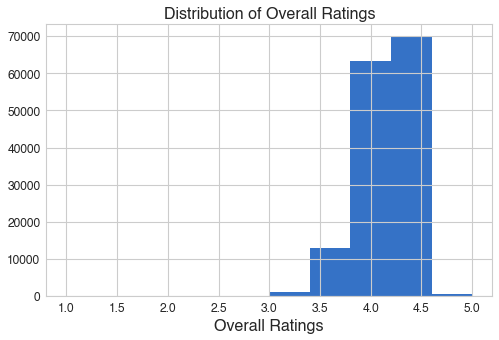

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df_full['overall_rating'])
ax.set_title('Distribution of Overall Ratings')
ax.set_xlabel('Overall Ratings')

In [32]:
# rating_cols = ['food_rating', 'service_rating', 
#                'value_rating', 'atmosphere_rating']
# fig, axs = plt.subplots(2,2)
# for ax, rating_col in zip(axs.flatten(), rating_cols):
#     ax.hist(df_full[rating_col])

In [33]:
review_cols = ['url', 'user_name', 'bubble_rating', 'review_contents']
df_top10 = df_full[df_full['ranking_int']<=10].drop(columns=review_cols).drop_duplicates()
df_top10.sort_values('ranking_int')

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,ranking_int
10018,"Sweet E's Cafe, Honolulu","Sweet E's Cafe, Honolulu: See 525 unbiased rev...",$$ - $$$ | American | Cafe | Vegetarian Friendly,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Brunch","American, Cafe","Takeout, Outdoor Seating, Seating, Parking Ava...",4.5,4.5,4.5,4.5,4.0,525.0,"#1 of 1,581 Restaurants in Honolulu","1006 Kapahulu Ave, Honolulu, Oahu, HI 96816-1309",Diamond Head - Kapahulu - St. Louis,https://media-cdn.tripadvisor.com/media/photo-...,1
128957,"Senia Restaurant, Honolulu","Senia Restaurant, Honolulu: See 156 unbiased r...",$$$$ | American | Vegan Options | Gluten Free ...,None,,"Vegan Options, Gluten Free Options","Lunch, Dinner",American,"Reservations, Seating, Wheelchair Accessible, ...",4.5,5.0,4.5,4.5,NaN,156.0,"#2 of 1,581 Restaurants in Honolulu","75 N King St, Honolulu, Oahu, HI 96817-5108",0.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,2
136134,"Poke Bar, Honolulu","Poke Bar, Honolulu: See 175 unbiased reviews o...",$$ - $$$ | Seafood | Hawaiian | Vegetarian Fri...,Poke is one of our most favorite traditional H...,$13 - $15,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night, Drinks","Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Wheelchair ...",4.5,5.0,4.5,4.5,NaN,175.0,"#3 of 1,581 Restaurants in Honolulu","226 Lewers Street #L106 Waikiki Beach Walk, Ho...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,3
10734,"Hiking Hawaii Cafe, Honolulu","Order food online at Hiking Hawaii Cafe, Honol...",$ | Cafe | Healthy | Vegetarian Friendly,None,$9 - $12,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"Cafe, Healthy",,4.5,4.5,4.5,4.5,3.5,195.0,"#4 of 1,581 Restaurants in Honolulu","1956 Ala Moana Blvd, Honolulu, Oahu, HI 96815-...",1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,4
107287,"La Mer, Honolulu","La Mer, Honolulu: See 673 unbiased reviews of ...",$$$$ | French | Vegetarian Friendly | Vegan Op...,None,$75 - $250,,,French,,4.5,4.5,5.0,4.0,5.0,673.0,"#5 of 1,581 Restaurants in Honolulu","2199 Kalia Rd Halekulani Hotel, Honolulu, Oahu...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,5
87332,"Chef Chai, Honolulu","Order food online at Chef Chai, Honolulu with ...",$$$$ | Asian | Vegetarian Friendly | Vegan Opt...,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night",Asian,,4.5,4.5,4.5,4.5,4.5,227.0,"#6 of 1,581 Restaurants in Honolulu","1009 Kapiolani Blvd, Honolulu, Oahu, HI 96814-...",1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,6
140583,"Uncle Bo's Pupu Bar & Grill, Honolulu","Uncle Bo's Pupu Bar & Grill, Honolulu: See 1,1...",$$ - $$$ | American | Bar | Seafood,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Late Night","American, Bar, Seafood, Hawaiian","Takeout, Reservations, Seating, Television, Hi...",4.5,4.5,4.5,4.5,4.0,1196.0,"#7 of 1,581 Restaurants in Honolulu","559 Kapahulu Ave, Honolulu, Oahu, HI 96815-3855",1.2 miles from Diamond Head State Monument,https://media-cdn.tripadvisor.com/media/photo-...,7
53904,"Lucky Belly, Honolulu","Reserve a table at Lucky Belly, Honolulu on Tr...",$$ - $$$ | Asian | Vegetarian Friendly | Vegan...,None,,"Vegetarian Friendly, Vegan Options","Lunch, Dinner, Late Night",Asian,"Takeout, Reservations, Seating, Wheelchair Acc...",4.5,4.5,4.5,4.5,4.5,493.0,"#8 of 1,581 Restaurants in Honolulu","50 N Hotel St Smith Street, Honolulu, Oahu, HI...",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,8
134836,"Orchids, Honolulu","Orchids, Honolulu: See 1,602 unbiased reviews ...",$$$$ | Contemporary | Hawaiian | Vegetarian Fr...,With s

# Part I: Popularity Recommender

# Part II: Content-Based Recommender

# Part III: Collaborative Filtering Recommender

## Drop Rows with Null Usernames

In [34]:
df_nonnull_users = df_full.drop(index=df_full[df_full['user_name'].isnull()].index).copy()
print('Before:', df_full.shape, '\nRemoved:', 
      str(df_full.shape[0]-df_nonnull_users.shape[0]), 
      '\nAfter:', df_nonnull_users.shape)

Before: (147742, 24) 
Removed: 762 
After: (146980, 24)


## Drop Rows with Usernames Containing Space (Real Names)

In [35]:
df_nonnull_users['invalid_username'] = 0
df_nonnull_users.loc[df_nonnull_users[df_nonnull_users['user_name'].str.contains(' ')].index, 'invalid_username'] = 1
df_nonnull_users.sample(5)

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,ranking,address,location,image_url,ranking_int,url,user_name,bubble_rating,review_contents,invalid_username
2263,"Giovanni Pastrami, Honolulu","Order food online at Giovanni Pastrami, Honolu...",$$ - $$$ | Italian | Deli | Vegetarian Friendly,None,$10 - $20,"Vegetarian Friendly, Gluten Free Options","Drinks, Breakfast, Lunch, Dinner, Brunch, Late...","Italian, Deli","Takeout, Reservations, Seating, Television, Hi...",4.0,...,"#162 of 1,581 Restaurants in Honolulu","227 Lewers St Ste 118, Honolulu, Oahu, HI 9681...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,162,https://www.tripadvisor.com/Restaurant_Review-...,Tom R,5.0,Pizza was great staff very friendly and helpfu...,1
57056,"Tsukenjo Lunch House, Honolulu","Tsukenjo Lunch House, Honolulu: See 3 unbiased...",,None,,,"Breakfast, Lunch",,,4.0,...,"#1,211 of 1,581 Restaurants in Honolulu","705 Cooke St, Honolulu, Oahu, HI 96813-5231",0.8 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,1211,https://www.tripadvisor.com/Restaurant_Review-...,HPXC,2.0,Growing up in Kakaako My friends and I would f...,0
56201,"goofy cafe & dine, Honolulu","goofy cafe & dine, Honolulu: See 1,647 unbiase...",,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"American, Cafe, Hawaiian",,4.5,...,"#50 of 1,581 Restaurants in Honolulu","1831 Ala Moana Blvd, Honolulu, Oahu, HI 96815-...",1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,50,https://www.tripadvisor.com/Restaurant_Review-...,TWags52,5.0,We had breakfast here. It was very good. It's ...,0
127500,"Plumeria Beach House, Honolulu","Reserve a table at Plumeria Beach House, Honol...",$$ - $$$ | American | Fusion | Hawaiian,On the edge of the sands of The Kahala Hotel &...,$30 - $60,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Drinks","Hawaiian, American, Fusion","Takeout, Highchairs Available, Full Bar, Reser...",4.5,...,"#51 of 1,581 Restaurants in Honolulu","5000 Kahala Ave, Honolulu, Oahu, HI 96816-5411",3.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,51,https://www.tripadvisor.com/Restaurant_Review-...,GratefulMo,4.0,"What more can I say...view, service, and great...",0
119387,"Kani Ka Pila Grille, Honolulu","Order food online at Kani Ka Pila Grille, Hono...",$$ - $$$ | American | Bar | Polynesian,None,,"Vegetarian Friendly, Gluten Free Options","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Bar, Polynesian, Hawaiian","Takeout, Reservations, Outdoor Seating, Seatin...",4.5,...,"#93 of 1,581 Restaurants in Honolulu","2169 Kalia Rd, Honolulu, Oahu, HI 96815-1936",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,93,https://www.tripadvisor.com/Restaurant_Review-...,denverjohn,5.0,A really nice grille with good food and great ...,0


In [36]:
df_valid_users = df_nonnull_users[df_nonnull_users['invalid_username']==0].copy()
print('Before:', df_nonnull_users.shape, '\nRemoved:', 
      str(df_nonnull_users.shape[0]-df_valid_users.shape[0]), 
      '\nAfter:', df_valid_users.shape)

Before: (146980, 25) 
Removed: 32660 
After: (114320, 25)


In [37]:
df_valid_users.sample(5)

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,ranking,address,location,image_url,ranking_int,url,user_name,bubble_rating,review_contents,invalid_username
54751,"goofy cafe & dine, Honolulu","goofy cafe & dine, Honolulu: See 1,647 unbiase...",$$ - $$$ | American | Cafe | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"American, Cafe, Hawaiian",,4.5,...,"#50 of 1,581 Restaurants in Honolulu","1831 Ala Moana Blvd, Honolulu, Oahu, HI 96815-...",1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,50,https://www.tripadvisor.com/Restaurant_Review-...,JustJenniT,5.0,Some friends and I dined here while on vacatio...,0
55639,"goofy cafe & dine, Honolulu","goofy cafe & dine, Honolulu: See 1,647 unbiase...",$$ - $$$ | American | Cafe | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"American, Cafe, Hawaiian",,4.5,...,"#50 of 1,581 Restaurants in Honolulu","1831 Ala Moana Blvd, Honolulu, Oahu, HI 96815-...",1.2 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,50,https://www.tripadvisor.com/Restaurant_Review-...,reannonlewis,4.0,My husband and I dined at Goofy Café and Dine ...,0
11521,"12th Avenue Grill, Honolulu","Order food online at 12th Avenue Grill, Honolu...",$$ - $$$ | American | Bar | Grill,Farm to table American cooking with locally so...,$25 - $45,Gluten Free Options,"Dinner, Drinks","Bar, American, Grill, Wine Bar","Seating, Parking Available, Wheelchair Accessi...",4.5,...,"#29 of 1,581 Restaurants in Honolulu","1120 12th Ave, Honolulu, Oahu, HI 96816-3790",1.3 miles from Diamond Head State Monument,https://media-cdn.tripadvisor.com/media/photo-...,29,https://www.tripadvisor.com/Restaurant_Review-...,TownGirl808,4.0,Food was AWESOME. Our appetizer was the figs ...,0
51133,"Sansei Seafood Restaurant & Sushi Bar, Honolulu",Reserve a table at Sansei Seafood Restaurant &...,$$ - $$$ | Japanese | Seafood | Sushi,Serving its award-winning Asian-Pacific cuisin...,$31 - $50,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night","Japanese, Seafood, Sushi, Asian","Takeout, Reservations, Seating, Parking Availa...",4.5,...,"#54 of 1,581 Restaurants in Honolulu",2552 Kalakaua Ave Waikiki Beach Marriott Resor...,0.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,54,https://www.tripadvisor.com/Restaurant_Review-...,397HelenS397,5.0,We had a great meal here. Knowledgable server ...,0
23571,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,25,https://www.tripadvisor.com/Restaurant_Review-...,Stew-san,5.0,Head over about 2 PM and grab a good spot at t...,0


## Get Subset of Data with Restaurant, User, Rating

In [38]:
df_valid_users_subset = df_valid_users[['restaurant_name', 'user_name', 'bubble_rating']]
df_valid_users_subset.head()

,restaurant_name,user_name,bubble_rating
0,Hanks Cafe Honolulu,waynen95,4.0
2,Hanks Cafe Honolulu,RowerChicago,5.0
4,Hanks Cafe Honolulu,cg148777,5.0
5,"Bethel Union, Honolulu",28franniel,4.0
6,"Bethel Union, Honolulu",LW811055,4.0


## Get Users with >= n Ratings

In [39]:
n = 5
df_valid_users_subset_grouped = df_valid_users_subset.groupby('user_name').count()['bubble_rating'].reset_index()
df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]

,user_name,bubble_rating
1,-Pikake-too,6
8,007sg,5
16,02b84b52,6
26,05Olga05,6
52,100PENANG,9
...,...,...
55079,zdaati,5
55092,zekimus,16
55122,zillabong,5
55133,zkeeper,11


In [40]:
users_min_n_ratings = df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]['user_name'].to_list()
len(users_min_n_ratings)

3998

## Utility Matrix

In [41]:
df_valid_users_subset_min_n_ratings = df_valid_users_subset.loc[df_valid_users_subset['user_name'].isin(users_min_n_ratings)]
utility_df = df_valid_users_subset_min_n_ratings.pivot_table(values='bubble_rating',index='user_name',columns='restaurant_name')
utility_df.shape

(3998, 1160)

In [42]:
utility_df.head()

restaurant_name,"100 Sails Restaurant & Bar, Honolulu","1132 Cafe & Catering, Honolulu","12th Avenue Grill, Honolulu","3 Star Gourmet Restaurant, Honolulu","3660 on the Rise, Honolulu","53 By The Sea, Honolulu","8 Fat Fat 8, Honolulu","8 Half Desserts, Honolulu","99 Local Mix Plate, Honolulu","9bar Hnl, Honolulu",...,"Zippy's Restaurant - Mokauea St, Honolulu","Zippy's Restaurant, Honolulu","Zippy's, Honolulu","Zippys Restaurant 1222 S King St, Honolulu","Zippys Restaurant Dillingham Blvd, Honolulu","Zippy’s Koko Marina, Honolulu","bills Hawaii, Honolulu","d.k Steak House, Honolulu","goofy cafe & dine, Honolulu","kim chee 2, Honolulu"
user_name,,,,,,,,,,,,,,,,,,,,,
-Pikake-too,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
007sg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02b84b52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Olga05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100PENANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings (per user): 1


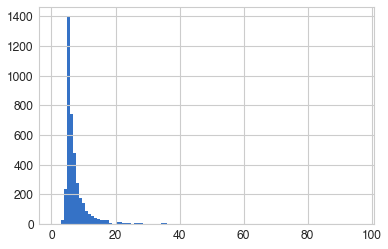

In [43]:
ratings = (utility_df > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings (per user): {}'.format(ratings.min()))

Min number of ratings (per restaurant): 1


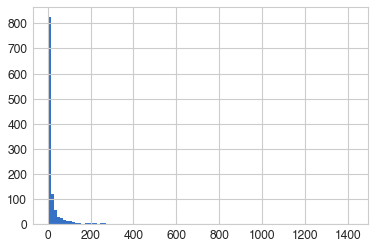

In [44]:
ratings = (utility_df > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings (per restaurant): {}'.format(ratings.min()))

In [45]:
number_ratings = (df_valid_users_subset['bubble_rating'] > 0).sum()
density = number_ratings / (utility_df.shape[0] * utility_df.shape[1])
print('The density is: {} '.format(density))

The density is: 0.02465025616256404 
